In [1]:
#  Terminology to be understand about our Popular SVM


# Support Vectors 
# Maximum Margin
#Maximum Margin Hyperplane
# Negative HyperPlane
# Positive Hyperplan


In [2]:
# Import Libraries

import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt

C:\FAST\anaconda\python27\win64\431\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
# Identify the shape of the dataset
dataset.shape

(400, 5)

In [5]:
# Identify the shape of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [6]:
# Set the Independent Variable (X) and dependent variable (y) = f(x)=y
## Make sure always X is matrix and Y is vector
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values

In [7]:
# Split the dataset into Training set and Testing Set
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

C:\FAST\anaconda\python27\win64\431\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [64]:
# Fitting SVM regression to the training set
# Test  with different Kernel -- "linear' , 'rbf', 'poly'
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 42)
classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [65]:

# Predict the test_set results
y_predict = classifier.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [66]:
# Evaluate the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_results = confusion_matrix(y_test,y_predict)
cm_results

array([[66,  2],
       [ 8, 24]])

In [67]:
print ("The True Positive of Number of People Purchased is {}".format(cm_results[0][0]))

The True Positive of Number of People Purchased is 66


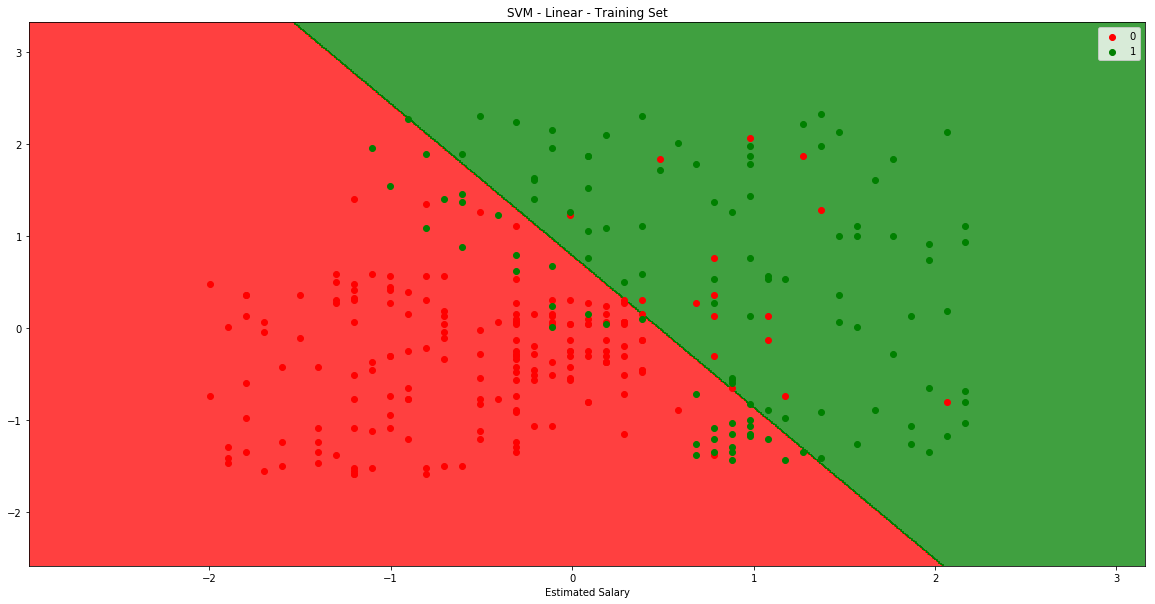

In [68]:
# Visualize the Testing dataset Result
# Import the Color Map class
from matplotlib.colors import ListedColormap

# Training Dataset
X_set,y_set = X_train, y_train

# set the plot figsize
plt.figure(figsize=(20,10))


# Prepare the grid by collect the pixel points and put it in the frame
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))


# Contour function will create a linear line between red and green
# Use predict function to predict the 0 or 1.If predict as 0 it will colorised as red or else it will green
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red','green')))

# Create a limit of estimate salary
plt.ylim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())


# Create a scatter plot
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set ==j, 0] , X_set[y_set ==j, 1], c = ListedColormap(('red','green'))(i), label = j)
    
plt.title("SVM - Linear - Training Set")
plt.xlabel("Age")
plt.xlabel("Estimated Salary")
plt.legend()
plt.show()


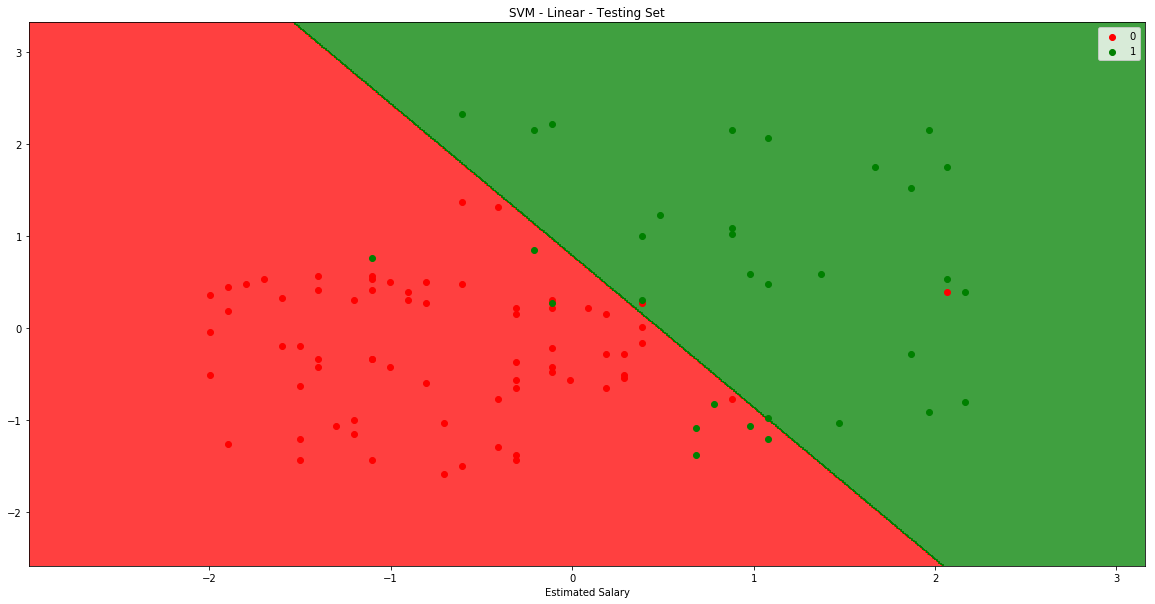

In [69]:
# Visualize the Testing dataset Result
# Import the Color Map class
from matplotlib.colors import ListedColormap

# Training Dataset
X_set,y_set = X_test, y_test

# set the plot figsize
plt.figure(figsize=(20,10))


# Prepare the grid by collect the pixel points and put it in the frame
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))


# Contour function will create a linear line between red and green
# Use predict function to predict the 0 or 1.If predict as 0 it will colorised as red or else it will green
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red','green')))

# Create a limit of estimate salary
plt.ylim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())


# Create a scatter plot
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set ==j, 0] , X_set[y_set ==j, 1], c = ListedColormap(('red','green'))(i), label = j)
    
plt.title("SVM - Linear - Testing Set")
plt.xlabel("Age")
plt.xlabel("Estimated Salary")
plt.legend()
plt.show()

In [70]:
print (cm_results)

[[66  2]
 [ 8 24]]


In [71]:
#https://www.kaggle.com/grfiv4/plot-a-confusion-matrix
import itertools
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [72]:
cm_results

array([[66,  2],
       [ 8, 24]])

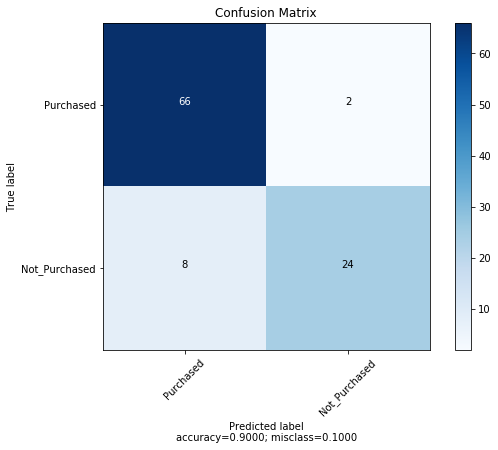

In [73]:
plot_confusion_matrix(cm           = cm_results, 
                      normalize    = False,
                      target_names = ['Purchased', 'Not_Purchased'],
                      title        = "Confusion Matrix")

In [74]:
# Predicted Correctly

print ("[TP] - Predicted - True Positive of Number of People Purchased is {}".format(cm_results[0][0]))
print ("[TN] - Predicted - True Negative of Number of People Not-Purchased is {}".format(cm_results[1][1]))

[TP] - Predicted - True Positive of Number of People Purchased is 66
[TN] - Predicted - True Negative of Number of People Not-Purchased is 24


In [75]:
# Predicted Wrongly
print ("[FN] - Predicted - False Negative of Number of People Purchased is {}".format(cm_results[0][1]))
print ("[FP] - Predicted - False Positive of Number of People Not-Purchased is {}".format(cm_results[1][0]))

[FN] - Predicted - False Negative of Number of People Purchased is 2
[FP] - Predicted - False Positive of Number of People Not-Purchased is 8


In [76]:
# Formula for Understanding Model Performance

# Accuracy = (TN+TP)/(TN+FP+FN+TP)
# Precision = TP/(FP+TP)
# Recall = Sensitivity = TP / (TP+FN)
# Specificity = TN / (TN+FP)

In [77]:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py
# Precision
#Precision (P) is defined as the number of true positives (T_p) over the number of true positives plus the 
#number of false positives (F_p).

## Accuracy = (TN+TP)/(TN+FP+FN+TP)
from sklearn.metrics import precision_score
accuracy_score = precision_score(y_test, y_predict)
print('Accuracy Score: {0:0.2f}'.format(accuracy_score))

Accuracy Score: 0.92


In [78]:

# Recall = Sensitivity = TP / (TP+FN)
from sklearn.metrics import recall_score
recall_value = recall_score(y_test, y_predict)
print('Recall Score: {0:0.2f}'.format(recall_value))

Recall Score: 0.75


In [79]:
# Calculate F1-Score
from sklearn.metrics import f1_score
fscore_value = f1_score(y_test, y_predict)
print('F-Score: {0:0.2f}'.format(fscore_value))

F-Score: 0.83


In [80]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_predict)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

from sklearn.metrics import recall_score
recall_value = recall_score(y_test, y_predict)
print('Average recall score: {0:0.2f}'.format(recall_value))

Average precision-recall score: 0.88
Average recall score: 0.75
